#### Note: This is very much an exploratory data analysis.

In [12]:
import pandas as pd
import cpi
import seaborn as sns
# Pyplot is an API mainly intented for interactive plots
import matplotlib.pyplot as plt

CPI data often comes with a warning that the data is stale. This makes sense, since the Bereau of Labor Statistics is always updating this library. Therefor, we need to update the data before using it. 

In [13]:
cpi.update()

We can create a data frame for the "All Items' tracked, which contains an average of inflation for many items. 

In [14]:
# Applying get() method on the 'series' attribute gives you 
# a particular CPI series for inspection
cpi_items_df = cpi.series.get(seasonally_adjusted=False).to_dataframe()

In [8]:
cpi_items_df.head()

,year,date,value,series_id,series_title,series_survey,series_seasonally_adjusted,series_periodicity_id,series_periodicity_code,series_periodicity_name,...,series_area_name,series_items_id,series_items_code,series_items_name,period_id,period_code,period_abbreviation,period_name,period_month,period_type
0,1997,1997-01-01,160.5,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
1,1998,1998-01-01,163.0,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
2,1999,1999-01-01,166.6,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
3,2000,2000-01-01,172.2,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
4,2001,2001-01-01,177.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual


This data is clean enough. However, there is information that is not necessary for us. So cleaning up further: 

In [15]:
# Only get the monthly series 
cpi_items_df = cpi_items_df[cpi_items_df['period_type'] == 'monthly']
# Make the date column values datetime objects 
cpi_items_df['date'] = pd.to_datetime(cpi_items_df['date'])
# Set the date as index
cpi_items_df = cpi_items_df.set_index('date')

<AxesSubplot:xlabel='date'>

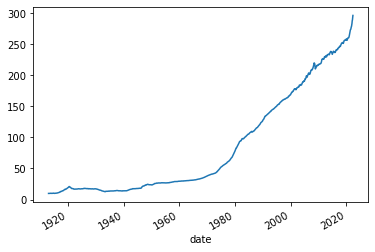

In [16]:
cpi_items_df['value'].plot()

Living in the 2020s, it's not really important for us to get the data starting from 1920s, so let's zoom in. 

Text(0.5, 0, 'CPI Value')

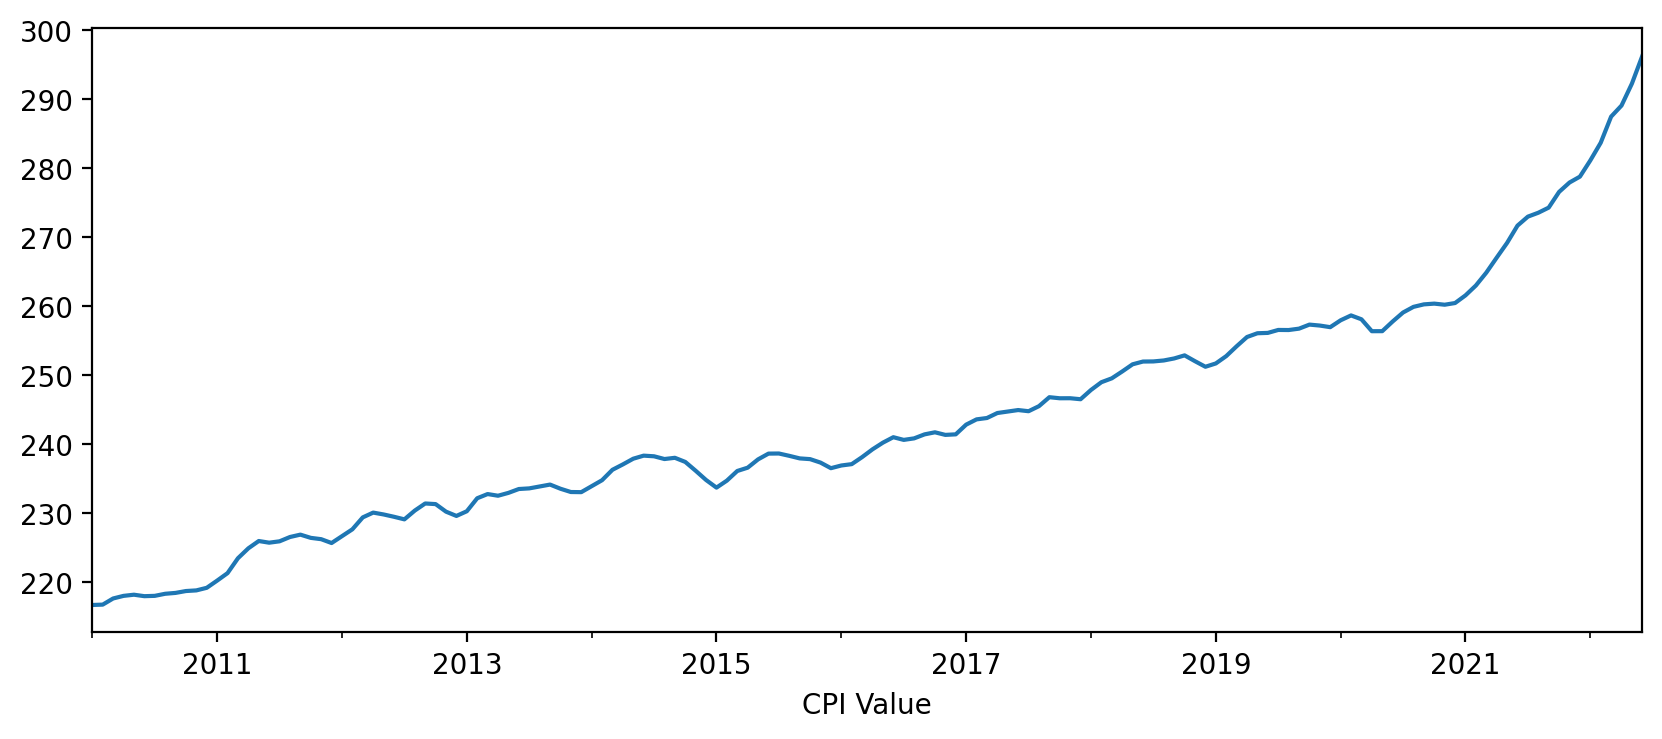

In [17]:
# Figure creates a new figure and can take in many parameters
# dpi: resolution of the figure in dots-per-inch
fig = plt.figure(dpi=200)
# filter by index 
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.xlabel('CPI Value')

Let's say we were targeting a yearly 2 % inflation rate since 2010. To see what that curve would look like on that on this same plot, we can do a simple method by looping through the values and adding a 2% starting from the original. Then, we will plot these values against the real data.

In [23]:
# Starting value: the year 2010
start = cpi_items_df['value'].loc['2010':'2023'].iloc[0]
# Periods 
periods = len(cpi_items_df['value'].loc['2010':'2023'])//12
periods

12

In [24]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02 * previous_cpi

In [25]:
target_cpis = [start]
for year in range(periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))
    
target_cpis

[216.687,
 221.02074000000002,
 225.44115480000002,
 229.949977896,
 234.54897745392,
 239.2399570029984,
 244.02475614305837,
 248.90525126591953,
 253.88335629123793,
 258.9610234170627,
 264.14024388540395,
 269.42304876311204,
 274.8115097383743]

Text(0, 0.5, 'CPI Values')

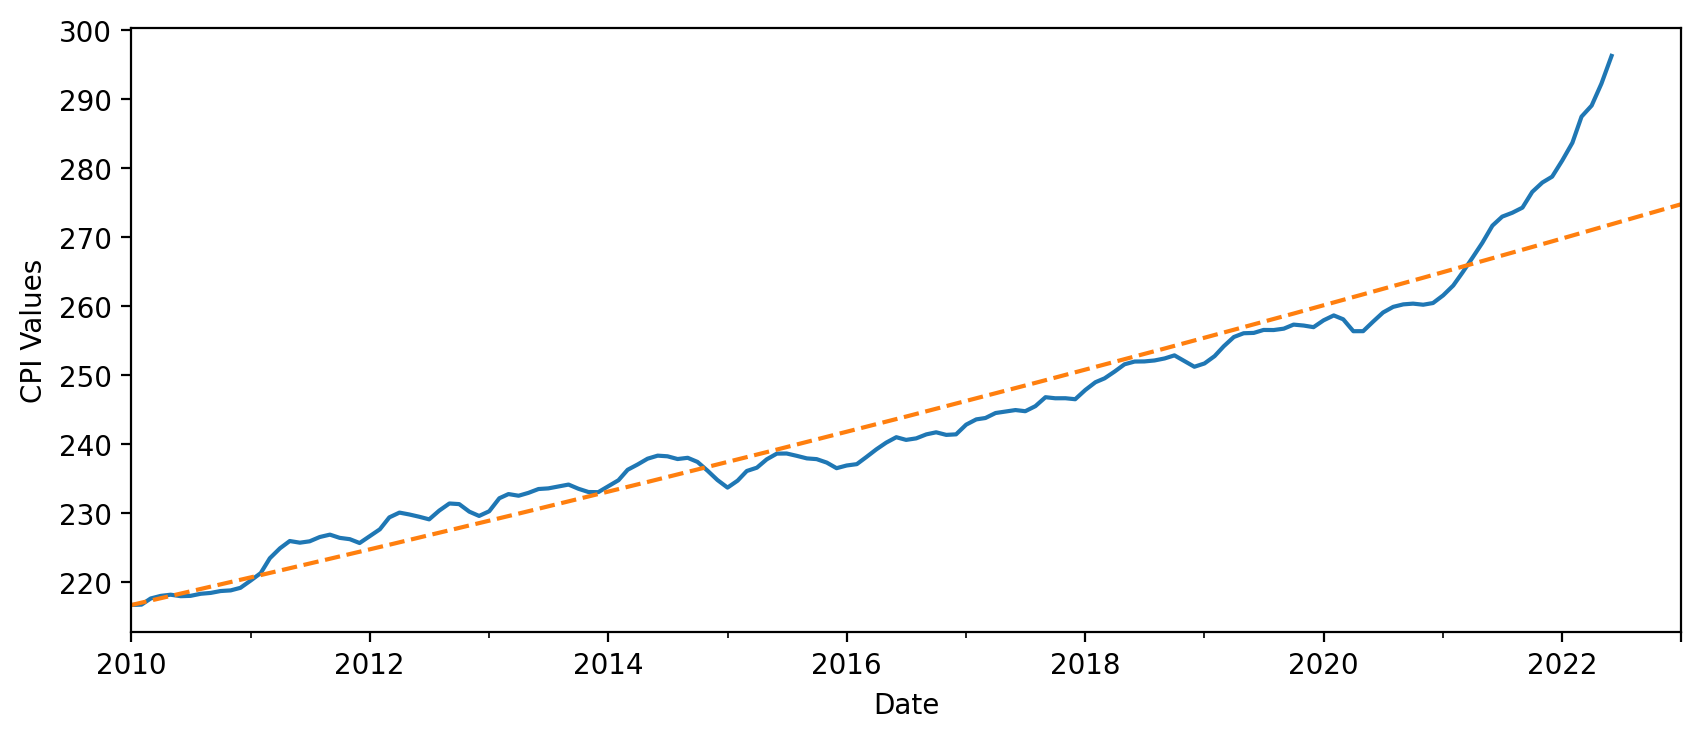

In [29]:
## Pandas df for expected CPIs
# date_range returns a fixed frequency Datetimeindex
dates = pd.date_range('2010-01-01', '2023-01-01', periods=periods+1)
# Make a series with the dates as index
target_cpi_series = pd.Series(data=target_cpis, index=dates)

# add the plot to fig
fig = plt.figure(dpi=200)
# add original values to the plot
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,4))
plt.xlabel('Date')
# Make a plot of the series
target_cpi_series.plot(ls='--')
plt.xlabel('Date')
plt.ylabel('CPI Values')

### Inflation in the 1970s

This data-turned-information shows us that things were going pretty steady and as expected until the pandemic. Then, inflation skyrocketed. Let's see how much worse or better this is than in the 1970s

In [32]:
# Starting value
start = cpi_items_df['value'].loc['1969':'1980'].iloc[0]

periods = len(cpi_items_df['value'].loc['1969':'1980'])//12

In [33]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02 * previous_cpi

In [34]:
target_cpis = [start]
for year in range(periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))
    
target_cpis

[35.6,
 36.312000000000005,
 37.03824,
 37.7790048,
 38.534584896000005,
 39.305276593920006,
 40.091382125798404,
 40.89320976831437,
 41.71107396368066,
 42.54529544295428,
 43.39620135181336,
 44.26412537884963,
 45.14940788642662]

Text(0, 0.5, 'CPI Values')

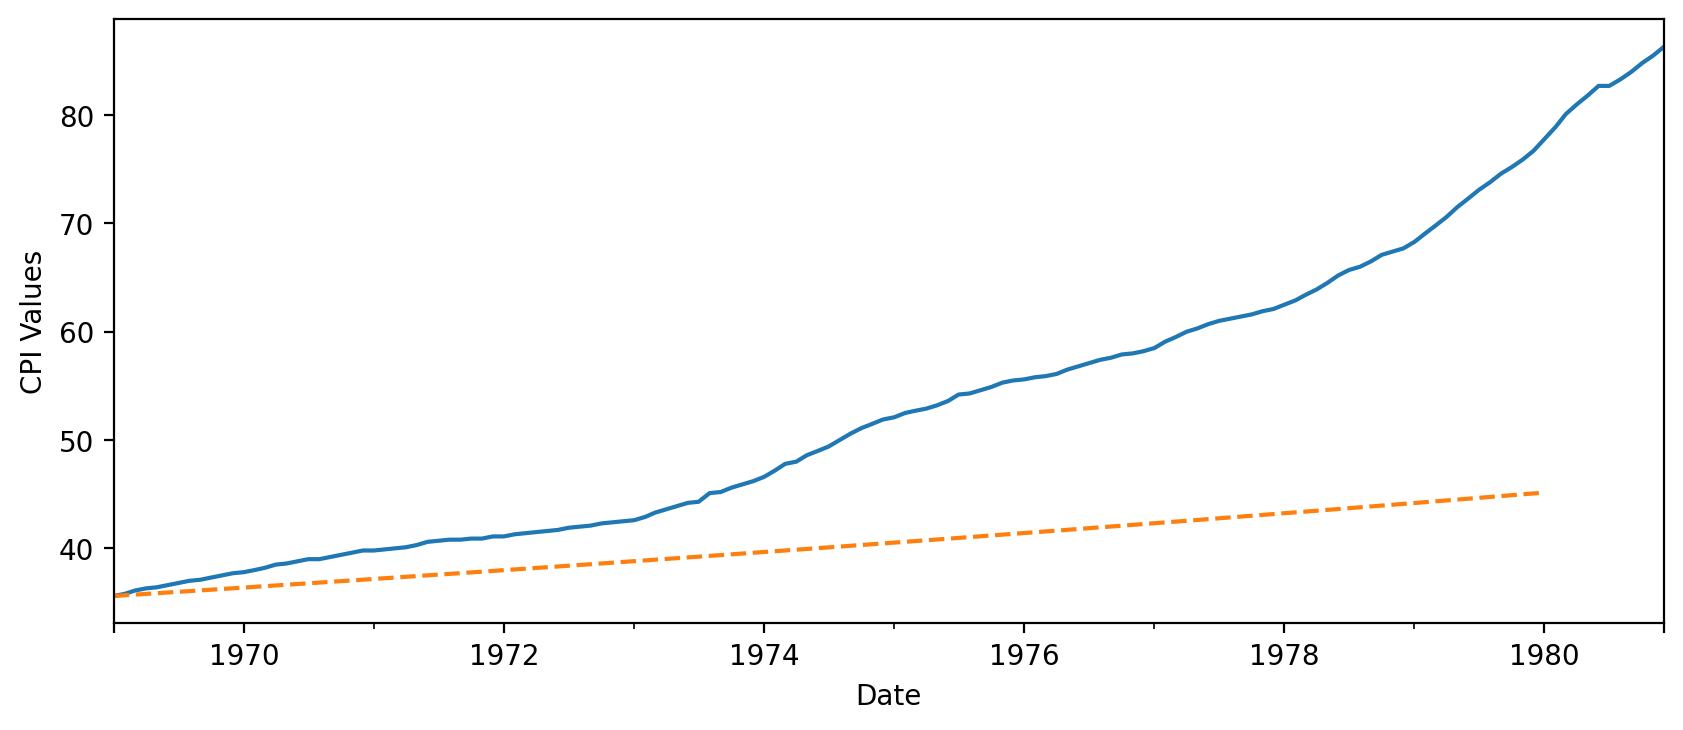

In [35]:
dates = pd.date_range('1969-01-01', '1980-01-01', periods=periods+1)
target_cpi_series = pd.Series(data=target_cpis, index=dates)
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1980'].plot(figsize=(10,4))
plt.xlabel('Date')
target_cpi_series.plot(ls='--')
plt.xlabel('Date')
plt.ylabel('CPI Values')

### Inflation after Vlocker raises rates

Now, we will see how things change when Volcker 'broke the back' of inflation by raising rates in the early 1980s.

Text(0, 0.5, 'CPI Values')

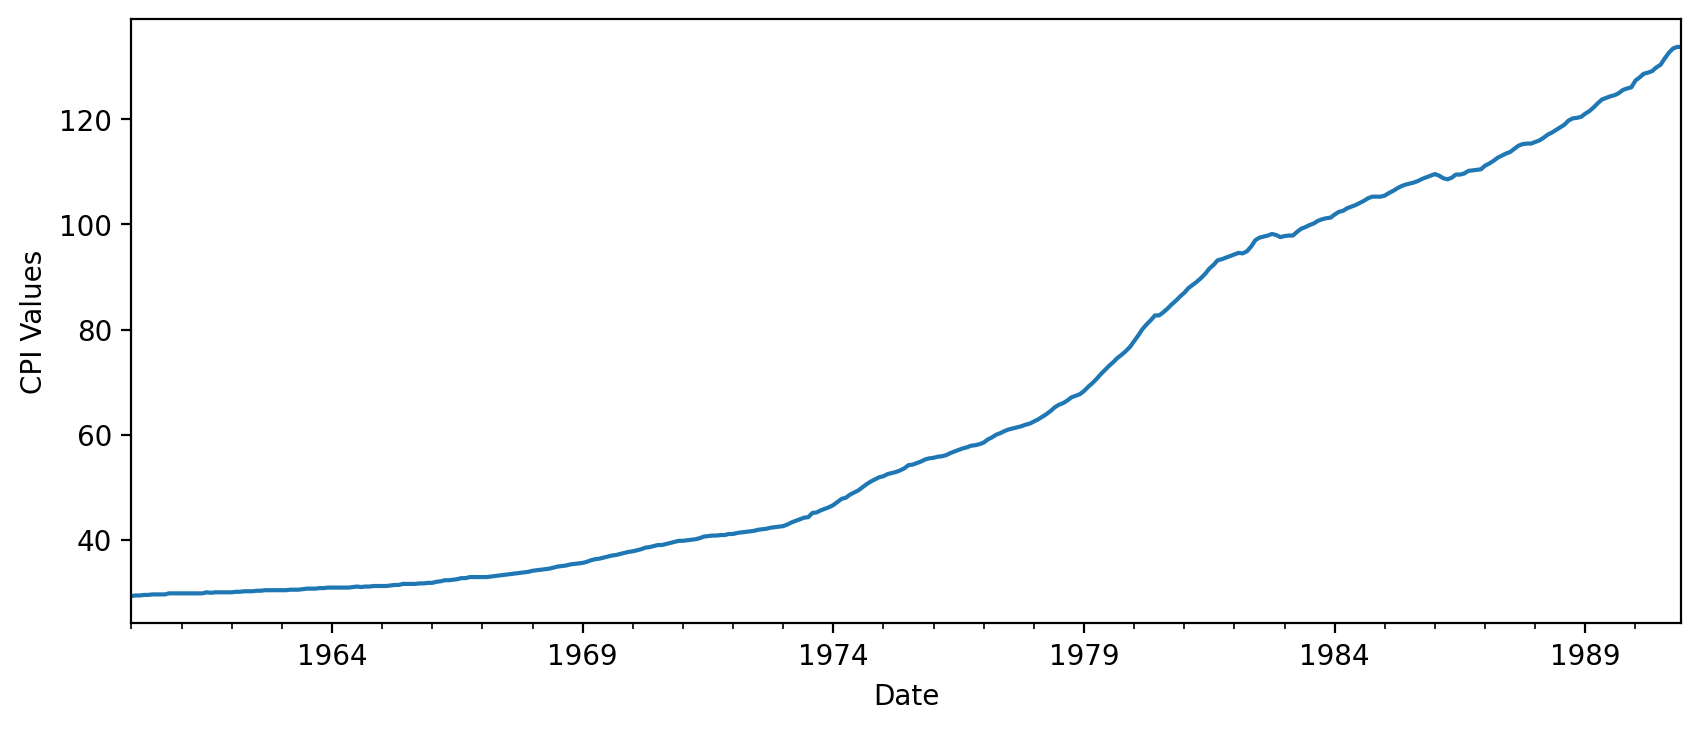

In [36]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1960':'1990'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('CPI Values')

### Inflation in percentages 

Text(0, 0.5, 'CPI YoY % Change')

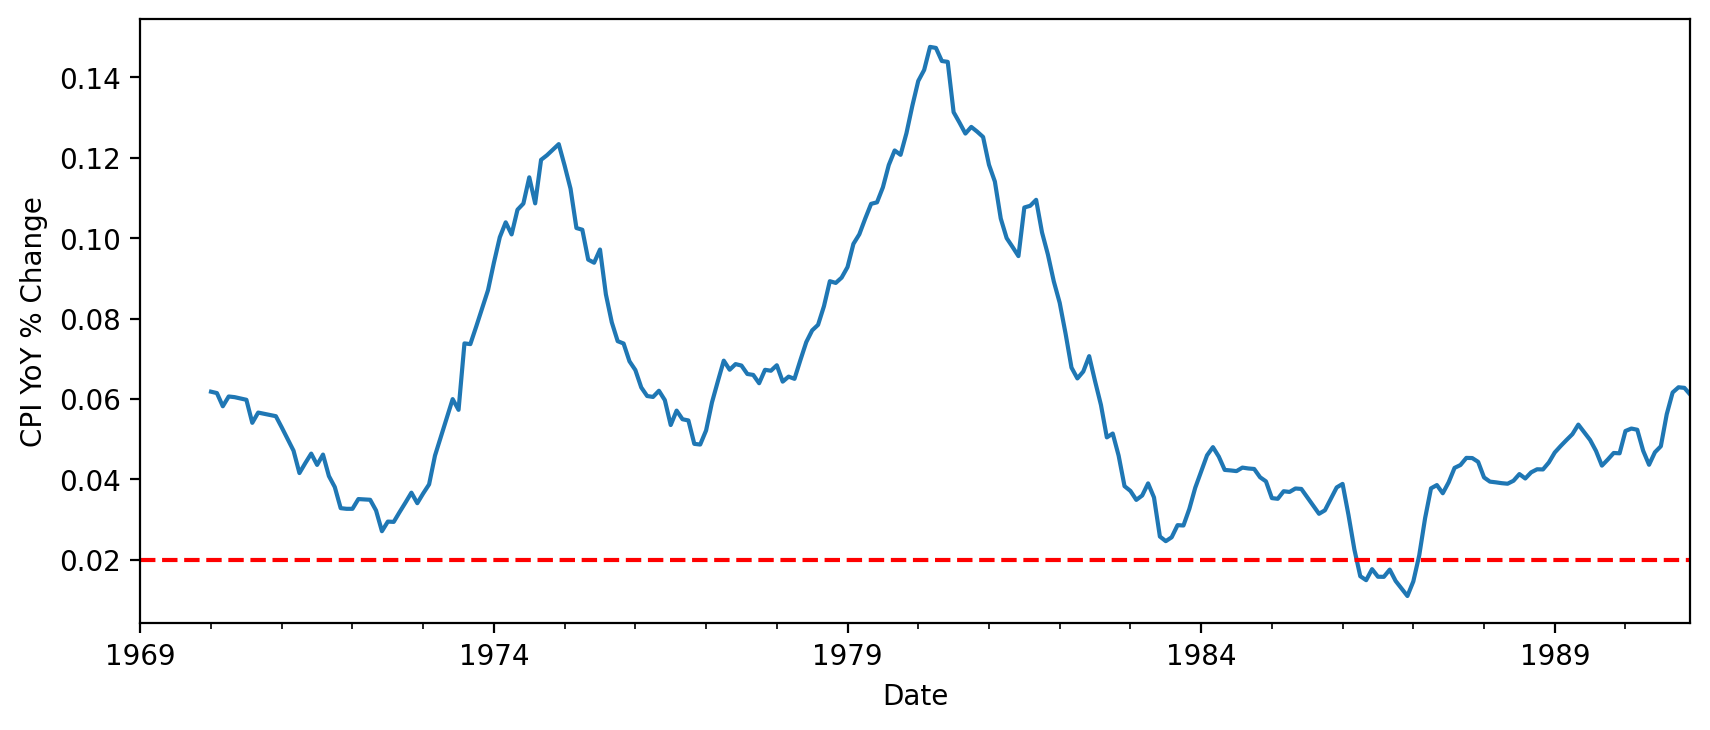

In [37]:
fig = plt.figure(dpi=200)
# pct_change gets the percentage difference between current and prior elements
cpi_items_df['value'].loc['1969':'1990'].pct_change(12).plot(figsize=(10,4))
# axhline adds horizontal line across the Axes
plt.axhline(0.02,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('CPI YoY % Change')

### Similar plot for current timeline

Text(0, 0.5, 'CPI YoY % Change')

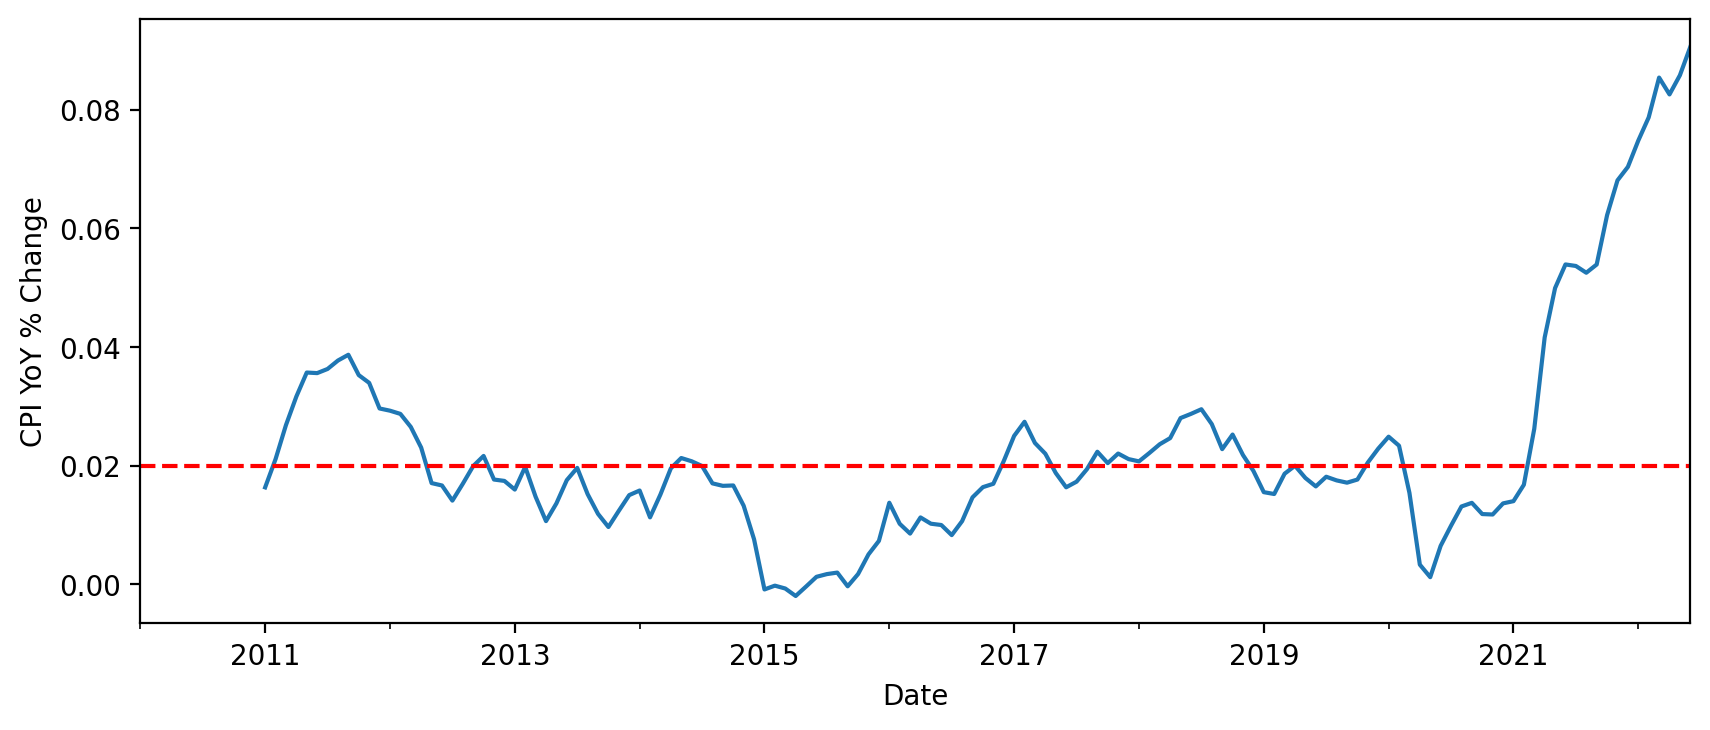

In [38]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0.02,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('CPI YoY % Change')

### Conclude: plot for gasoline

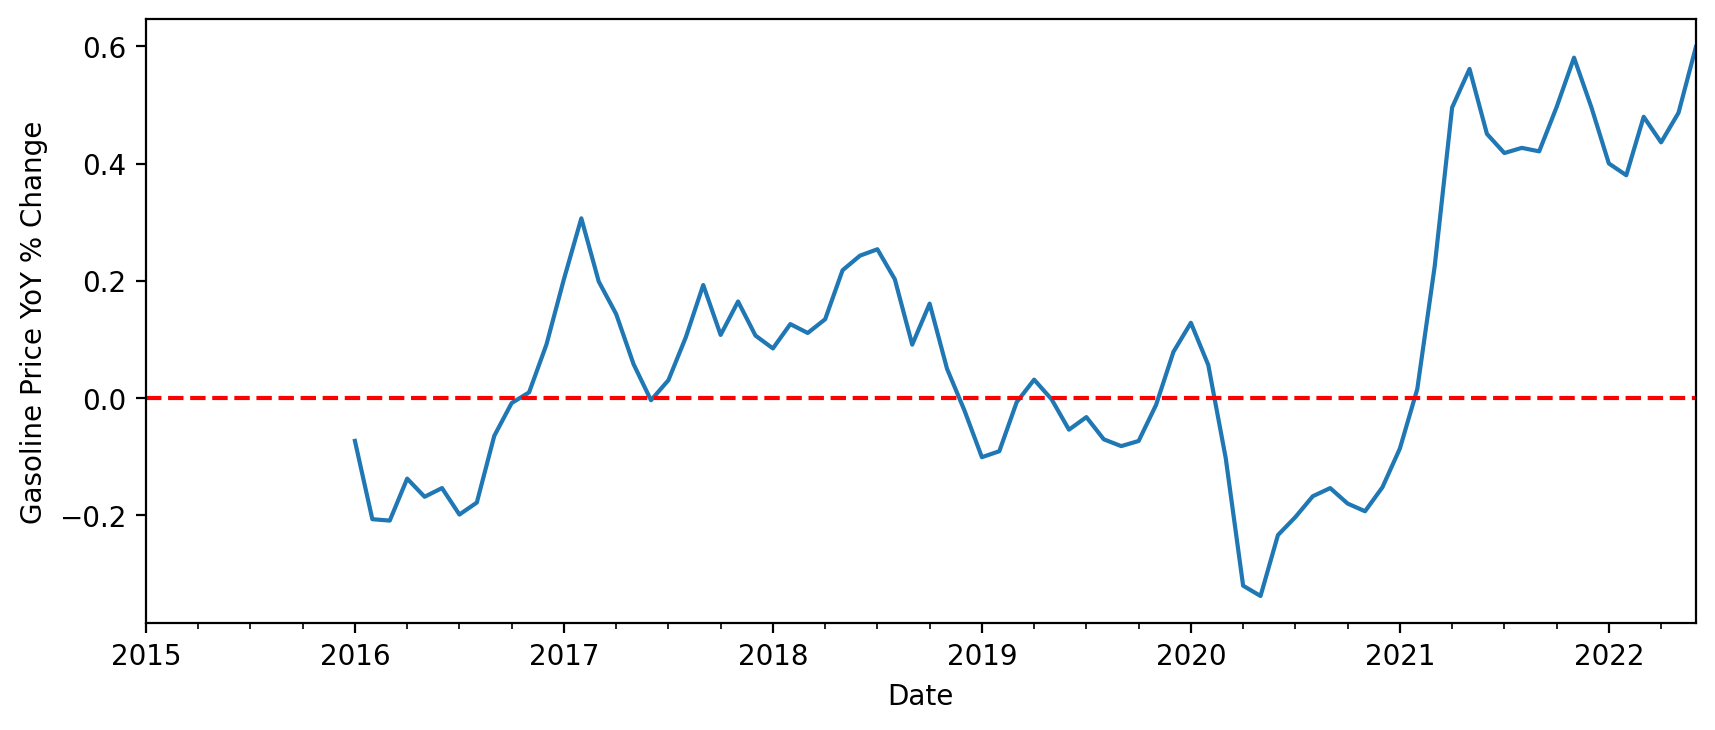

In [44]:
gas = cpi.series.get(items="Gasoline (all types)",
                     seasonally_adjusted=False).to_dataframe()

gas = gas[gas['period_type']=='monthly']
gas['date'] = pd.to_datetime(gas['date'])
gas = gas.set_index('date')

fig = plt.figure(dpi=200)
gas['value'].loc['2015':'2023'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('Gasoline Price YoY % Change');

### Therefore, there is clearly very high inflation in gasoline.